# Ultimate Technologies Inc. Data Science Challenge

# Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the login.json file
logins = pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [5]:
#checking for missing values
logins.isnull().sum()

login_time    0
dtype: int64

In [6]:
#setting login_time column as index
logins.set_index('login_time',inplace=True)

In [7]:
#adding count column
logins['count']=1

In [8]:
#Aggregate login counts based on 15 minute intervals
logins_15min = logins.resample('15Min').sum()
logins_15min.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


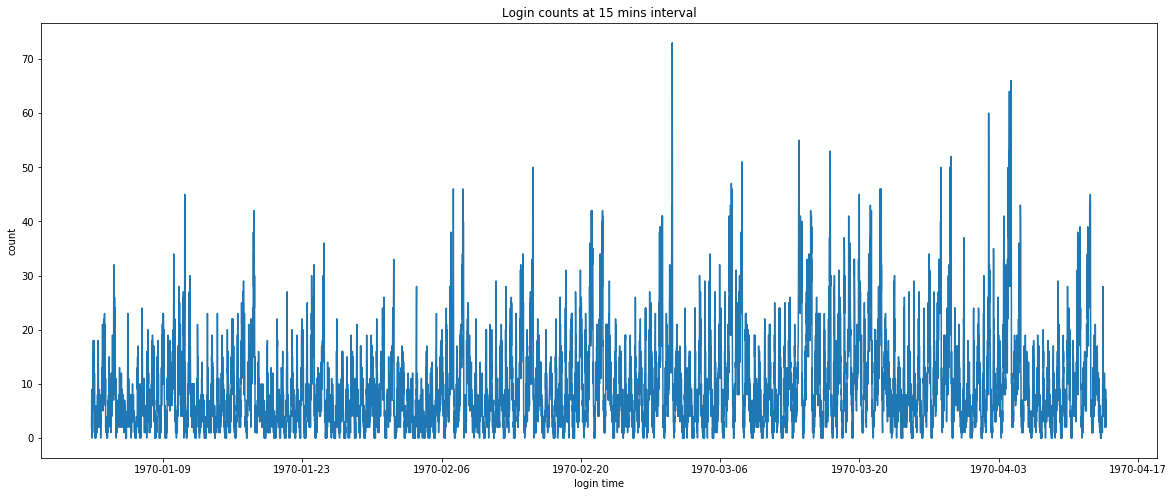

In [9]:
#15 mins interval plot
plt.figure(figsize=(20,8))
plt.plot(logins_15min)
plt.xlabel('login time')
plt.ylabel('count')
plt.title('Login counts at 15 mins interval')
plt.show()

The 15 minute interval plot gives a very noisy plot. Let's plot this data with 1 day interval

In [10]:
logins_1day = logins.resample('D').sum()
logins_1day.head()

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


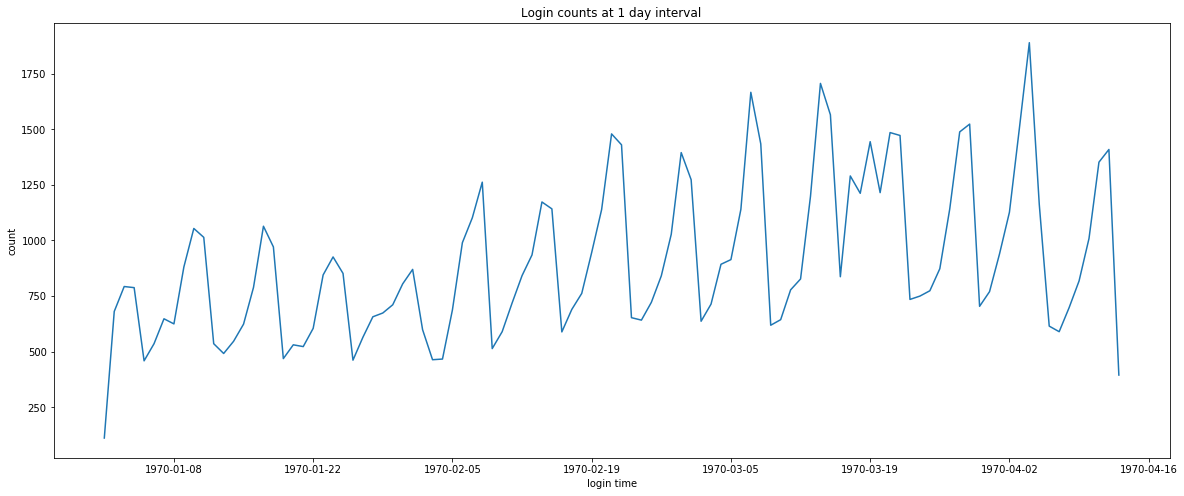

In [11]:
#1 day interval plot
plt.figure(figsize=(20,8))
plt.plot(logins_1day)
plt.xlabel('login time')
plt.ylabel('count')
plt.title('Login counts at 1 day interval')
plt.show()

Look's like daily logins increased in the month of march. Let's see if there is variation in the logins during weekdays and weekends

In [12]:
logins.reset_index(inplace=True)
logins['date']=logins['login_time'].dt.date
logins['day']=logins['login_time'].dt.dayofweek
logins['hour']=logins['login_time'].dt.hour
logins['month']=logins['login_time'].dt.month

In [13]:
logins.head()

,login_time,count,date,day,hour,month
0,1970-01-01 20:13:18,1,1970-01-01,3,20,1
1,1970-01-01 20:16:10,1,1970-01-01,3,20,1
2,1970-01-01 20:16:37,1,1970-01-01,3,20,1
3,1970-01-01 20:16:36,1,1970-01-01,3,20,1
4,1970-01-01 20:26:21,1,1970-01-01,3,20,1


We see that the day column is in codes. Let us map the day number to the days and month number to month name

In [14]:
logins.day = logins.day.map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
logins.month = logins.month.map({1:'January',2:'February',3:'March',4:'April'})

In [15]:
logins.head()

,login_time,count,date,day,hour,month
0,1970-01-01 20:13:18,1,1970-01-01,Thursday,20,January
1,1970-01-01 20:16:10,1,1970-01-01,Thursday,20,January
2,1970-01-01 20:16:37,1,1970-01-01,Thursday,20,January
3,1970-01-01 20:16:36,1,1970-01-01,Thursday,20,January
4,1970-01-01 20:26:21,1,1970-01-01,Thursday,20,January


In [16]:
weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday']
logins['weekday']=logins.day.isin(weekday)
logins.head()

,login_time,count,date,day,hour,month,weekday
0,1970-01-01 20:13:18,1,1970-01-01,Thursday,20,January,True
1,1970-01-01 20:16:10,1,1970-01-01,Thursday,20,January,True
2,1970-01-01 20:16:37,1,1970-01-01,Thursday,20,January,True
3,1970-01-01 20:16:36,1,1970-01-01,Thursday,20,January,True
4,1970-01-01 20:26:21,1,1970-01-01,Thursday,20,January,True


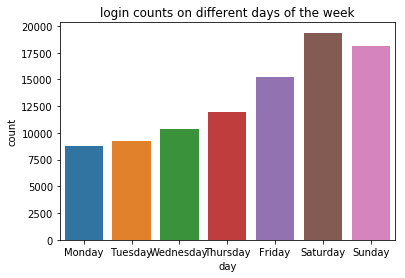

In [17]:
#plotting logins grouped by days
day_count = logins.groupby('day').size().to_frame('count').reset_index()
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']
sns.barplot(data=day_count, x="day", y="count",order=day_order)
plt.title('login counts on different days of the week')
plt.show()

The number of logins are more during the weekends (saturday and sunday) . The login counts also increase as we progress towards the weekend

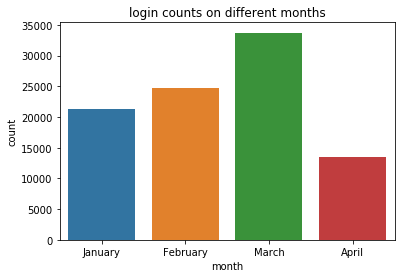

In [18]:
#plotting logins grouped by months
monthly_count = logins.groupby('month').size().to_frame('count').reset_index()
month_order = ['January','February','March','April']
sns.barplot(data=monthly_count, x="month", y="count",order=month_order)
plt.title('login counts on different months')
plt.show()

The number of logins increase during march and the drastically dropped in april

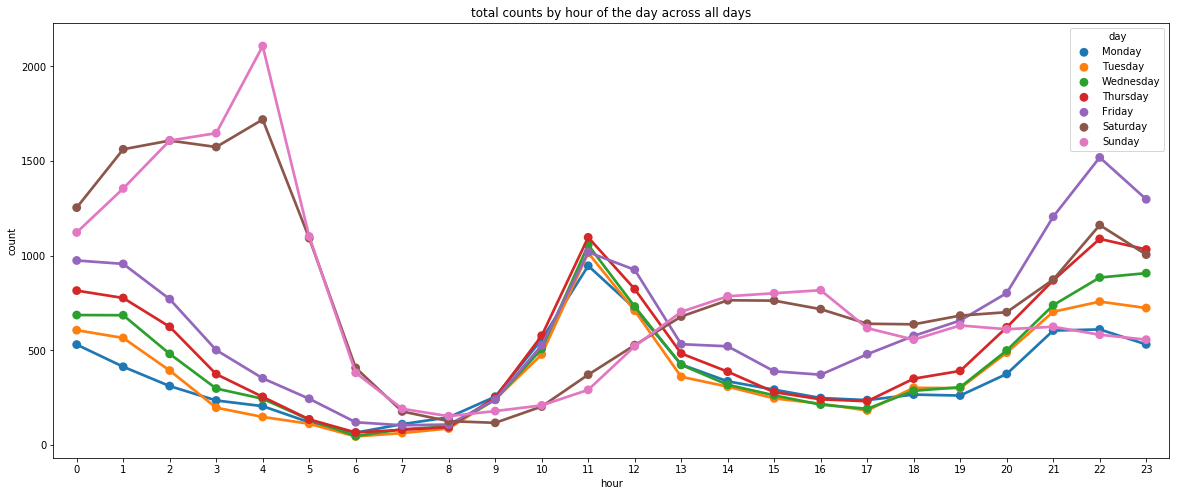

In [19]:
#Let's plot the login trend during every day (on hourly basis) of the week
plt.figure(figsize=(20,8))
hourly_count = logins.groupby(['hour', 'day']).size().to_frame('count').reset_index()
hourly_order = ['1','2','3','4','5']
sns.pointplot(x='hour',y='count',hue ='day',hue_order= day_order,data=hourly_count)
plt.title('total counts by hour of the day across all days')
plt.show()

We can see that during weekdays, the logins increase between 10-13 (10AM-1PM) hours. Peak is during noon time. The logins decrease and the increase again after 18 hours (6PM). During weekends, the highest logins are from midnight to 3AM and then it increases later in the afternoon 13-17 (1-5PM)

# Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.
Part

1) The choice of key measure primarily depends on the definition of success by the company. A two-way toll reimbursement can be a big financial cost to the company. My approach would eb ti find out what their goal is. If the company wants to increase their customer base by providing flexibilty, then the number of rides can be a good metric. However, if the company wants to maximize profit, then profit earned would be a good metric. Usually companies would want both. In that case we could use a metric that combines both. For example, imcrease in rides per dollar spent in reimbursement.

2) The company can randomly select some driver partners and give them the option of toll reimbursement. They can run the experiment for few weeks and collect data such as, number of rides, start and end point of rides, distance, time of ride, profit made post reimbursement.

The null hypothesis tested here is that the number of rides before and after reimbursement remain the same. We can use t-test to reject the null hypothesis.

Additionally, the data should be used to answer some of the following questions:
1. Did drivers operate more cross-city trips post reimbursement?
2. Did drivers with toll reimbursement bring more or less profit? By how much?
3. At what time of day did drivers take more cross-city trips?
All of these questions should be analyzed separately for both weekdays and weekends.


# Part 3 ‐ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

# Data description
● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYY MM DD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

In [20]:
import json
with open('ultimate_data_challenge.json', 'r') as json_file:
    json_data = json.load(json_file)


In [21]:
df=pd.DataFrame(json_data)

In [22]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [24]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [25]:
# avg_rating_of_driver, avg_rating_by_driver and phone have missing values
# fill avg_rating_of_driver and avg_rating_by_driver using median values
df.avg_rating_by_driver.fillna(df.avg_rating_by_driver.median(),inplace=True)
df.avg_rating_of_driver.fillna(df.avg_rating_of_driver.median(),inplace=True)

In [26]:
#phone
df.phone.unique()

array(['iPhone', 'Android', None], dtype=object)

In [27]:
df.phone.fillna('notknown', inplace=True)

In [28]:
#checking for missing  values
df.isnull().values.any()

False

In [29]:
#convert date columns into datetime
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)

In [30]:
#range of sign up dates and range of last trip dates
print('Range of sign up dates is between {} and {}'
     .format(df['signup_date'].min(),df['signup_date'].max()))
print('Range of last trip dates is between {} and {}'
     .format(df['last_trip_date'].min(),df['last_trip_date'].max()))

Range of sign up dates is between 2014-01-01 00:00:00 and 2014-01-31 00:00:00
Range of last trip dates is between 2014-01-01 00:00:00 and 2014-07-01 00:00:00


The data contains all the users who signed up in January,2014. The last trip date ranges from Jan,2014 to July 1st, 2014. So, any user who took a trip in the 30 days preceeding july 1st,2014 (June 1st, 2014) is considered active.

In [31]:
data_pull_day=df.last_trip_date.max()
cut_off_day=data_pull_day-pd.Timedelta('30D')

In [32]:
data_pull_day

Timestamp('2014-07-01 00:00:00')

In [33]:
cut_off_day

Timestamp('2014-06-01 00:00:00')

In [34]:
df['active_status']= (df.last_trip_date > cut_off_day).astype(int)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_status
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [35]:
print('Number of active_users=', len(df[df['active_status']==1]))
print('Fraction of users retained=',(len(df[df['active_status']==1])/len(df['active_status'])))

Number of active_users= 18310
Fraction of users retained= 0.3662


In [36]:
df['phone'] = df['phone'].astype('category')
df['city'] = df['city'].astype('category')


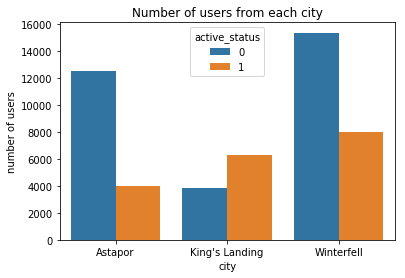

In [37]:
sns.countplot(x='city',hue='active_status',data = df)
plt.xlabel('city')
plt.ylabel('number of users')
plt.title('Number of users from each city')
plt.show()


In [38]:
df.city.groupby(df['active_status']).value_counts()

active_status  city          
0              Winterfell        15355
               Astapor           12512
               King's Landing     3823
1              Winterfell         7981
               King's Landing     6307
               Astapor            4022
Name: city, dtype: int64

Winterfell and Astaphor have more signups, but they are not staying active. King's landing seems to have lower sign up and lower inactive users too.

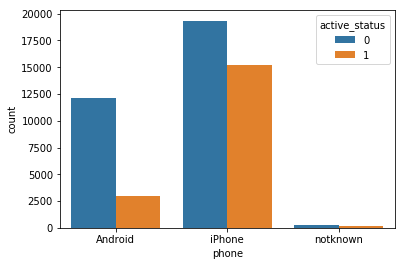

In [39]:
#type of phone
sns.countplot(x="phone",hue="active_status",data = df)
plt.show()

There is more signup and retention among iphone users

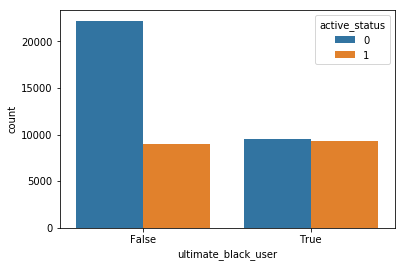

In [40]:
# Ultimate_black users signup
sns.countplot(x="ultimate_black_user",hue="active_status",data = df)
plt.show()

Ultimate black user signups have more retention

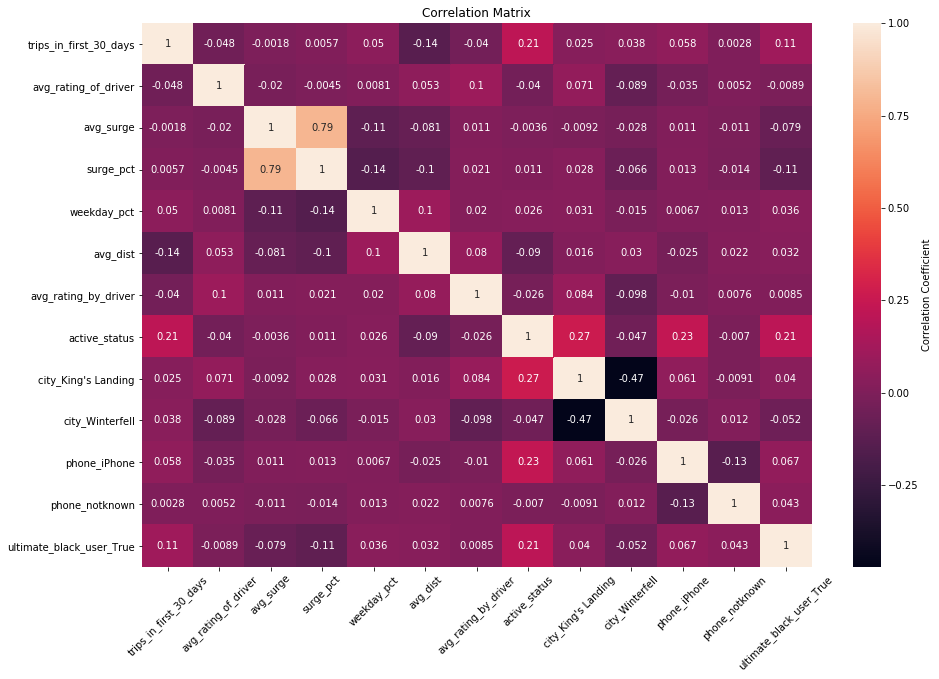

In [41]:
#let's generate a correlation heatmap of all the columns to see which features are correlated
#convert city, phone and ultimate_black_users to dummy variables
df=pd.get_dummies(df,columns=['city','phone','ultimate_black_user'],drop_first=True)
#generate correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True,cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()


We see that users from king's landing city, iphone user and ultimate_black_users are morelikely to be retained

In [42]:
# Prediction Model
X = df.drop(['last_trip_date','signup_date','active_status'],axis=1)
y = df['active_status']

In [43]:
# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import scikitplot as skplt

In [44]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [45]:
#grid search
grid={'max_depth':[10,20,50,70],
             'min_samples_leaf':[1,2,4,6],
              'max_features':['auto','sqrt','log2']}
clf = RandomForestClassifier()
cv = GridSearchCV(clf, grid,cv = 5)

In [46]:
#find best parameters
cv.fit(X_train, y_train)
print('best parameter:{}'.format(cv.best_params_),'best score:{}'.format(cv.best_score_))

best parameter:{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2} best score:0.7868285714285714


In [47]:
# fit the data with best parameters
clf = RandomForestClassifier(max_depth=10 ,max_features= 'auto' ,min_samples_leaf= 4)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
#generate classification report
print(classification_report(clf.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83     10112
           1       0.65      0.73      0.69      4888

    accuracy                           0.78     15000
   macro avg       0.75      0.77      0.76     15000
weighted avg       0.79      0.78      0.79     15000



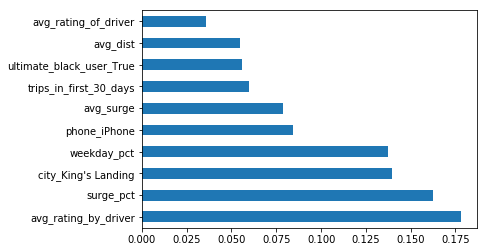

In [49]:
#find the important features
feature_importance= pd.Series(clf.feature_importances_,index=X_train.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()


The classifier built has 79% accuracy. Based on the feature importance plot, avg_rating_by_driver seems to be the key feature. The company should focus on users from King's landing city. Other important features are surge_pct and weekday_pct. Therefore, users who use the service during surge time and weekdays are more likely to be retained 